<h1>FinRisk: Investment Risk Prediction Using Machine Learning</h1>

<h3>Importing necessary Libraries</h3>

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np

<h3>Reading the data</h3>

In [28]:
data = pd.read_csv('all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


<h3>Getting the data info</h3>

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


<h3>Detailed data</h3>

In [30]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


<h3>Data  cleaning procedure</h3>

In [31]:
data = data.drop(columns = ['date', 'Name'])
data.head()

,open,high,low,close,volume
0,15.07,15.12,14.63,14.75,8407500
1,14.89,15.01,14.26,14.46,8882000
2,14.45,14.51,14.10,14.27,8126000
3,14.30,14.94,14.25,14.66,10259500
4,14.94,14.96,13.16,13.99,31879900


In [32]:
data['Return'] = data['close'].pct_change()

data['MA20'] = data['close'].rolling(window=20).mean()
data['MA50'] = data['close'].rolling(window=50).mean()

data['Volatility'] = data['Return'].rolling(window=20).std()

data = data.dropna()
data.head()


,open,high,low,close,volume,Return,MA20,MA50,Volatility
49,15.99,16.00,15.50,15.52,9227100,-0.031211,16.0925,15.2986,0.023353
50,15.33,16.49,15.33,16.30,12302300,0.050258,16.0775,15.3296,0.026100
51,16.26,16.50,16.00,16.45,6114400,0.009202,16.0745,15.3694,0.026162
52,16.55,16.73,16.19,16.22,5548800,-0.013982,16.0530,15.4084,0.026267
53,16.38,16.73,16.16,16.59,7272100,0.022811,16.0340,15.4470,0.026425


<h3>Defining the target variable</h3>

In [33]:
# Define risk as significant negative returns (e.g., more than -2%)
data['Risk'] = np.where(data['Return'] < -0.015, 1, 0)

# Display the first few rows to verify the target variable
print(data[['Return', 'Risk']].head())


      Return  Risk
49 -0.031211     1
50  0.050258     0
51  0.009202     0
52 -0.013982     0
53  0.022811     0


A new column 'Risk' is created here, the thresholds are set such that, if the return is < -2%, we say that it is risky. Well, does that mean our 'Risk' variable depends only and only on 'Returns' and not on other features? Definately not! Since the column of risk was not initially present in the dataset, and that the risk majorly depends on the return stats, we set our target variable ('Risk') on the basis of 'Returns'. Futher, the model we build involves our other features that will help in prediciting the risk when some new input is given.

<h3>Risks involved</h3>

<Axes: xlabel='Risk'>

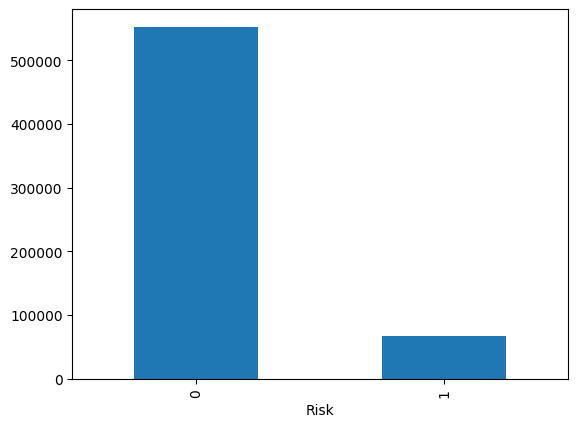

In [34]:
data["Risk"] = data['Risk'].astype("category", copy=False)
data["Risk"].value_counts().plot(kind = "bar")

<h3>Splitting the Data</h3>

In [35]:
from sklearn.model_selection import train_test_split

features = ['open' , 'high', 'low', 'close', 'volume', 'MA20', 'MA50', 'Volatility']
X = data[features]
y = data['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (433286, 8)
Testing data shape: (185694, 8)


<h3>Training the model by feeding the 'Training Data Set'</h3>

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<h3>Evaluation of the model</h3>

In [37]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Accuracy: 0.93
Precision: 0.81
